Suren Gunturu

## Part A

In [61]:
import numpy as np
import pandas as pd
from scipy import linalg as ln
import statsmodels.api as sm

In [59]:
def LSLF(filename): 
    """
    Perform Least Squares using Linear Algebra
    
    Eqn: A_T * A * x = A_T * b
    """
    data = pd.read_csv(filename)
    size = len(data['x'])
    
    #create the A matrix with .T at the end to get the correct configuration
    A = np.append(np.ones(size), values = data['x'].to_numpy()).reshape(2, size).T
    
    #Perform computation from the equation above
    A_T_b = np.dot(A.T, data['y'].to_numpy())
    A_T_A = np.dot(A.T, A)
    x = ln.solve(A_T_A, A_T_b)
    
    #Compute the error
    error = np.sum((np.dot(A, x) - data['y'].to_numpy()) ** 2)
    return {"intercept": x[0], "slope": x[1], "error": error}

## Part B

In [100]:
def statsModelLibrary(filename): 
    data = pd.read_csv(filename)
    X = data['x']
    Y = data['y']
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    ans = model.fit()
    error = np.sum(((ans.params[0]  + ans.params[1] * data['x']) - data['y']) ** 2)
    return {"intercept": ans.params[0], "slope": ans.params[1], "error": ans.mse_resid * len(Y)}

In [101]:
import matplotlib.pyplot as plt
def graph(filename): 
    data = pd.read_csv(i)
    X = data['x']
    Y = data['y']
    res = LSLF(i)
    fig, ax = plt.subplots(figsize = (4, 3))
    ax.scatter(X, Y, label = "data points")
    ax.set_title(filename, fontsize = 14)
    ax.set_xlabel("x")
    ax.set_ylabel("y", labelpad = 20, rotation = 0)
    ax.plot(X, res["slope"] * X + res["intercept"], c = "orange", label = "Line of Best Fit")
    plt.legend()
    plt.show()

nbatm.csv
Linear Algebra Answer: 
{'intercept': 0.49996666666666667, 'slope': 0.0003586734814401219, 'error': 0.025115332761522283}
Real Answer: 
{'intercept': 0.49996666666666656, 'slope': 0.00035867348144012214, 'error': 0.02690928510163103}




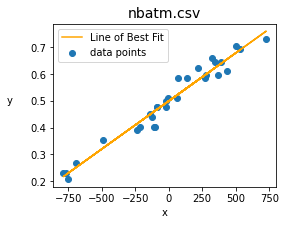



population.txt
Linear Algebra Answer: 
{'intercept': -3740767381.460539, 'slope': 2002587.0905133039, 'error': 5282560399260050.0}
Real Answer: 
{'intercept': -3740767381.460525, 'slope': 2002587.090513297, 'error': 5391479170378814.0}




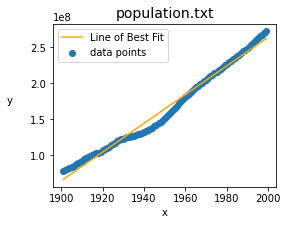



TVlife.txt
Linear Algebra Answer: 
{'intercept': 57.33689873481886, 'slope': 0.032435373622846174, 'error': 1417.8916710642698}
Real Answer: 
{'intercept': 57.336898734818845, 'slope': 0.03243537362284622, 'error': 1559.680838170697}




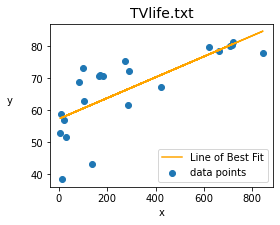

In [102]:

filenames = ["nbatm.csv", "population.txt", "TVlife.txt"]
for i in filenames: 
    print(i)
    print("Linear Algebra Answer: ")
    print(LSLF(i))
    print("Real Answer: ")
    print(statsModelLibrary(i))
    print("\n")
    graph(i)
    print("\n")
    

As shown above, the nba and population data can be shown as a linear relationship since the line of best fit goes through a lot of the data and the errors aren't as big. Especially for the population data, the error is big because the y-values are very big. Relative to the size of the y-values, the error is not as big and as shown in the graph, the points tend to follow a very linear relationship followed by the line of best fit. The TV life data does not look very lineary since a lot of the data points close to zero are not that close to the line, so with the TV life data, a linear relationship should not assumed and instead, one may need to look at quadratic or anything else. 

## Part C

## Part One of Part C is in another pdf that is submitted in files

In [120]:
nba_data = pd.read_csv("nbatm.csv")
nba_data = nba_data[nba_data.columns[np.arange(1, 7)]]

In [185]:
def MyReg(df, r): 
    """
    Randomly generate training and test data from data frame df
    
    Use r% of df as training data and rest as test data
    
    Use A_T * A * x = A_T * b to solve for the best fit weights 
    
    Use squared loss function to get the errors 
    """
    size = len(df)
    n_cols = len(df.columns)
    training_data = df.sample(int(0.01 * r * size))
    
    #Use of linear algebra to get the weights 
    b = training_data['y']
    A = training_data[df.columns[np.arange(n_cols - 1)]].to_numpy().reshape(int(0.01 * r * size), n_cols - 1)
    A_T_b = np.dot(A.T, b)
    A_T_A = np.dot(A.T, A)
    x = ln.solve(A_T_A, A_T_b)
    
    #Use of test data to get the errors 
    test_data = df[np.isin(np.arange(size), training_data.index, invert = True)]
    A_test = test_data[df.columns[np.arange(n_cols - 1)]].to_numpy().reshape(size - int(0.01 * r * size), n_cols - 1)
    error = np.sum((np.dot(A_test, x) - test_data['y'].to_numpy()) ** 2)
    return {"weights": x, "Loss": error}

In [192]:
x = np.arange(10, 101)
loss = np.array([])
for i in x: 
    loss = np.append(loss, MyReg(nba_data, i)["Loss"])
loss

<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=8.59593e-23): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=9.59382e-23): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=6.19571e-22): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=1.8807e-24): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=1.19285e-24): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=1.18782e-24): result may not be accurate.
  x = ln.solve(A_T_A, A_T_b)
<ipython-input-185-19bea97e45f1>:9: LinAlgWarning: Ill-conditioned matrix (rcond=8.44457e

array([7.74800237e-02, 1.01405670e+01, 3.01466818e+00, 1.57551465e+03,
       2.86089569e-01, 2.88642640e-01, 6.93726313e-02, 1.09929309e-01,
       2.94389584e+00, 2.93187738e+00, 2.68862017e-02, 2.69076433e-02,
       2.27167846e+00, 1.27786049e-01, 4.75009076e-02, 3.52986883e-01,
       6.03064617e-02, 2.67620758e-02, 3.14632915e-02, 4.69870988e-02,
       2.41556944e-02, 8.34565295e-02, 7.62690505e-02, 3.05427338e-02,
       6.67125463e-02, 2.48928036e-02, 1.95600426e-02, 2.95718239e-02,
       2.87843479e-02, 3.48155096e-02, 2.38665596e-02, 2.16044396e-02,
       4.60691694e-02, 3.10233777e-02, 2.82416305e-02, 2.51540994e-02,
       1.19023755e-01, 1.70864422e-02, 1.71003807e-02, 4.15814312e-02,
       1.63917693e-02, 5.47018378e-03, 2.02138874e-02, 2.33454196e-02,
       1.32410437e-02, 1.04428324e-02, 2.47935132e-02, 1.31178178e-02,
       1.21077043e-02, 1.11619995e-02, 1.02878816e-02, 5.53558803e-03,
       7.12621926e-03, 1.73747210e-02, 1.37863752e-02, 4.32880069e-02,
      

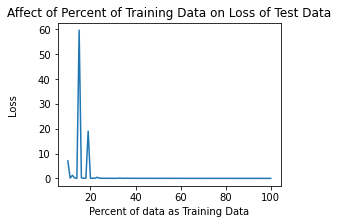

In [191]:
fig, ax = plt.subplots(figsize = (4, 3))

ax.plot(x, loss)
ax.set_title("Affect of Percent of Training Data on Loss of Test Data")
ax.set_xlabel("Percent of data as Training Data")
ax.set_ylabel("Loss", labelpad = 20)

plt.show()

The graph above shows fluctuations in the loss values when the percent of data is lower showing that it really matters what data the dataframe is randomly generating. However, as the percent of data (r) increases, the loss values tend to go to zero showing that more training data does help with the accuracy of test data. However, as there is more training data, the loss function for test data doesn't need to add as many terms which is why for example at 90% training data, there is only 3 test data points and only 3 errors adding up whereas when it is 70%, then there are 9 test data points added up. Because of this, it is better to not keep the training data percentage too high so the weights are not based soley on all the training points and instead there is some testing going on. A better loss function to use is MSE for the mean error since total error would always favor the test data set with the least values